In [ ]:
# !pip install pandas datetime plotly

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import plotly.express as px
import matplotlib.pyplot as plt

In [9]:
# function to randomly generate a reading based on some conditions
def generate_single_reading(hour, day):
    if 10<=hour<=21:
        if day in ('Saturday', 'Sunday'):
            reading = np.random.uniform(1.0,3.8)
        else:
            reading = np.random.uniform(1.0,3.5)
    else:
        reading = np.random.uniform(0.3,0.8)
    return reading

In [ ]:
def generate_energy_dataset(start_date, period=24*30*7, _id = 89133, datetime_as_index=True):
    """
    Function to generate synthetic energy(electricity meter reading) dataset for a given time range.
    Inputs:
        start_date : start date of the desired time range
        period : total number of hours in the desired time range. Default value is 7 months
        _id : unique id for each reading for all 3 meters.  Default value is 89133
        datetime_as_index : 
            If True, the datetime column is set as index.
            If False, the datetime column is kept separate.
            Default value is True.
    """

    # setting up time period for synthetic data generation 
    end_time = start_date + timedelta(hours=period)
    time_index = pd.date_range(start=start_date, end=end_time, freq='h')
    updated_data = []

    for dt in time_index:   #looping through all the dates
        hour = dt.hour
        day = dt.day_name()

        if np.random.random() < 0.005:
            updated_data.append(rows)       #system failure, adding previous value (duplication of previous value)
            continue

        # each row to add in the data
        rows = {
            'Datetime': dt,
            'MeterA_ID': f"SMR{_id}A",
            'MeterA_reading' : generate_single_reading(hour, day),
            'MeterB_ID': f"SMR{_id}B",
            'MeterB_reading' : generate_single_reading(hour, day),
            'MeterC_ID': f"SMR{_id}C",
            'MeterC_reading' : generate_single_reading(hour, day),
        }
        _id += 1
        
        # choosing a meter randomly to add a outlier
        meter_choice = np.random.choice(['MeterA_reading', 'MeterB_reading', 'MeterC_reading'])

        for key in ['MeterA_reading', 'MeterB_reading', 'MeterC_reading']:
            if np.random.random() < 0.008:
                rows[key] = np.nan  #fail to transmit data by meter
            
        if np.random.random() < 0.001:  #less than 1% chance for outliers
            print(f"outliers with {dt}")
            rows[meter_choice] = rows[meter_choice] + np.random.choice([3,-5,5,-3])     #an outlier in the data (replicating old sensor needing replacement)

        if len(updated_data) > 80 and np.random.random() < 0.001:
            tempered_value = np.random.choice([0.0, np.random.uniform(2,2.2)])
            if tempered_value != 0.0:
                unusual_period = int(np.random.uniform(24*3,24*5))
            else:
                unusual_period = int(np.random.uniform(4,8))

            while unusual_period != 0:
                if tempered_value == 0.0:
                    print(f"load_shedding with {dt} for {unusual_period}")
                    for key in ['MeterA_reading', 'MeterB_reading', 'MeterC_reading']:
                        updated_data[-unusual_period][key] = 0.0  #load shedding (zero consumption of electricity)
                else:
                    print(f"meter_tempered with {dt} for {unusual_period}")
                    updated_data[-unusual_period][meter_choice] = tempered_value    #tampering with meter data transmission
                unusual_period -= 1
            
        updated_data.append(rows)

    df = pd.DataFrame(updated_data)

    if datetime_as_index: #if datetime column should be kept as index
        df.set_index('Datetime', inplace=True) #setting datetime as index 

    return df

In [34]:
df = generate_energy_dataset(start_date=datetime(2025, 1, 1))

outliers with 2025-01-06 19:00:00
outliers with 2025-01-15 04:00:00
outliers with 2025-01-15 16:00:00
outliers with 2025-01-23 02:00:00
outliers with 2025-01-28 00:00:00
outliers with 2025-02-05 01:00:00
outliers with 2025-02-17 03:00:00
outliers with 2025-02-25 20:00:00
outliers with 2025-03-06 01:00:00
load_shedding with 2025-03-24 15:00:00 for 7
load_shedding with 2025-03-24 15:00:00 for 6
load_shedding with 2025-03-24 15:00:00 for 5
load_shedding with 2025-03-24 15:00:00 for 4
load_shedding with 2025-03-24 15:00:00 for 3
load_shedding with 2025-03-24 15:00:00 for 2
load_shedding with 2025-03-24 15:00:00 for 1
outliers with 2025-06-15 22:00:00
outliers with 2025-06-29 11:00:00
outliers with 2025-06-30 20:00:00
load_shedding with 2025-07-12 09:00:00 for 4
load_shedding with 2025-07-12 09:00:00 for 3
load_shedding with 2025-07-12 09:00:00 for 2
load_shedding with 2025-07-12 09:00:00 for 1
load_shedding with 2025-07-17 13:00:00 for 4
load_shedding with 2025-07-17 13:00:00 for 3
load_sh

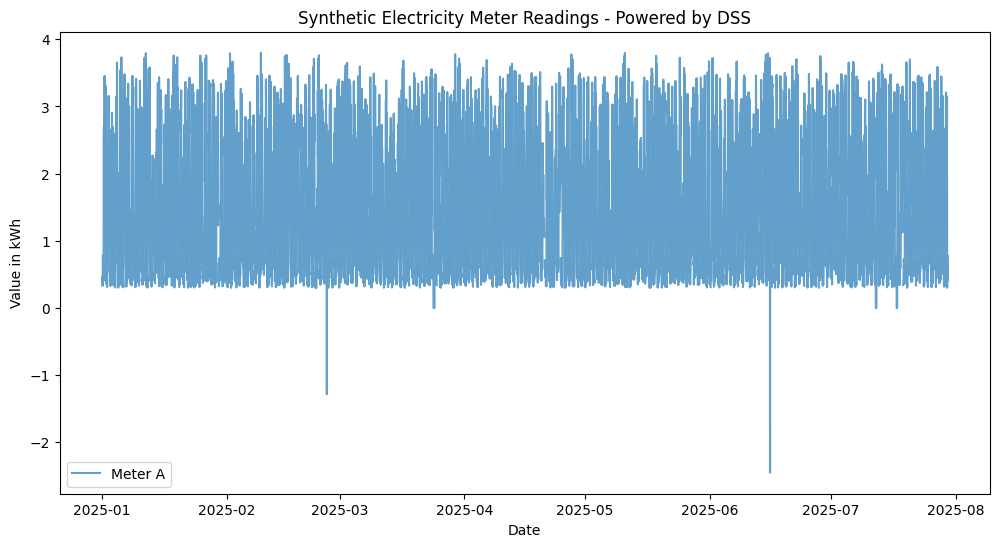

In [35]:
# fig = px.line(df, x=df.index, y='MeterA_reading', title='Synthetic Electricity Meter Readings - Powered by DSS')
# # Show the plot
# fig.show()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MeterA_reading'], label='Meter A', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Value in kWh')
plt.title('Synthetic Electricity Meter Readings - Powered by DSS')
plt.legend()

In [36]:
df.to_csv("differentiative_readings_data.csv")

## Cumilative readings

In [5]:
df = pd.read_csv("differentiative_readings_data.csv")

In [6]:
# Perform cumulative addition for numeric columns
df[['MeterA_reading', 'MeterB_reading', 'MeterC_reading']] = df[['MeterA_reading', 'MeterB_reading', 'MeterC_reading']].cumsum()

In [7]:
df.isna().sum()  # Check for NaN values in the DataFrame

Datetime           0
MeterA_ID          0
MeterA_reading    40
MeterB_ID          0
MeterB_reading    33
MeterC_ID          0
MeterC_reading    44
dtype: int64

<Axes: title={'center': 'Meter A'}>

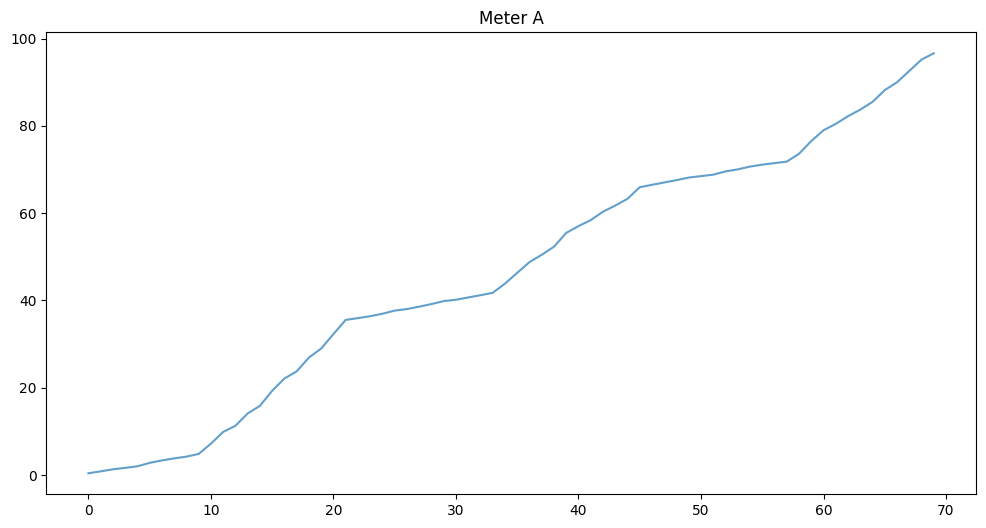

In [11]:
df["MeterA_reading"][:70].plot(title="Meter A", figsize=(12, 6), label='Meter A', alpha=0.7)

In [41]:
df.to_csv("cumulative_readings_data.csv")